<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/implementation_of_kmeans_plusplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Install the Fuzzy c-means library
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# Models
from sklearn.cluster import KMeans
from fcmeans import FCM
# Generator of data
from sklearn.datasets import make_blobs
# Select  cluster centers of the k-mean 
from sklearn.cluster import kmeans_plusplus
# graphics and colors
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')


**Objective**: Select the initial cluster centers of the k-mean clustering for others models.

In [27]:
# Generate sample data
n_samples = 5000
# Generate centers number 
n_clusters = 5
# Generate seed
random_state = 198

In [28]:
def generate_data(n_features:int=2, n_samples:int=500, n_components:int=3,
                  cluster_std:float=0.60, random_state:int=8)->tuple:
  """data generator"""
  X, y = make_blobs(
      n_samples=n_samples, centers=n_components, cluster_std = 0.60,
      random_state=random_state
  )
  return X, y


def generate_colors(paleta="Set1", n_colors=15):
  """Colors generator"""
  cmap = sns.color_palette(paleta, n_colors).as_hex()
  list_camap = ListedColormap(cmap)
  return cmap, list_camap

In [29]:
X, y = generate_data(n_samples=n_samples,n_components=n_clusters, random_state=random_state)

In [30]:
centers_init, indices = kmeans_plusplus(X, n_clusters=n_clusters, random_state=random_state)

In [31]:
# n_clusters: n of clusters
# y: reference of cluster
#
def scater_center(n_clusters, y, cluster_center):
  colorss, _ = generate_colors(n_colors=n_clusters)
  for i, col in enumerate(colorss):
    cluster_data = (y == i)
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

  plt.scatter(cluster_center[:, 0], cluster_center[:, 1], c="b", s=50)
  plt.title("K-Means++ Initialization")
  plt.xticks([])
  plt.yticks([])
  plt.show()


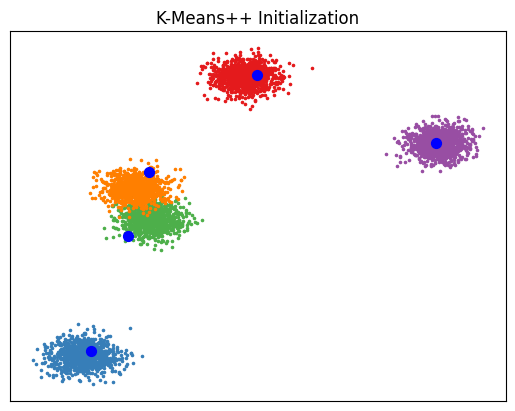

In [32]:
scater_center(n_clusters, y, centers_init)

In [33]:
# Implement a kmeans model
model = KMeans(n_clusters=n_clusters)
model.fit(X)

KMeans(n_clusters=5)

In [34]:
centers_init_kmeans = model.cluster_centers_

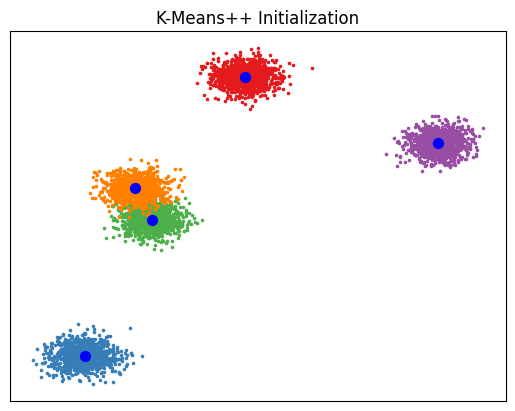

In [35]:
#Coordinates of kmeans 
scater_center(n_clusters, y, centers_init_kmeans) 

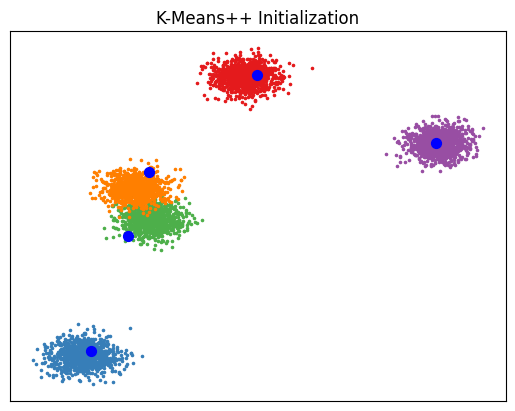

In [36]:
# replace of seed of coordinates of centers
model.cluster_centers_ =  centers_init
centers_init_kmeans = model.cluster_centers_
scater_center(n_clusters, y, centers_init_kmeans) 

In [37]:
# instance model fuzy
fcm = FCM(n_clusters=n_clusters)
fcm.fit(X)

In [38]:
#dir(fcm)

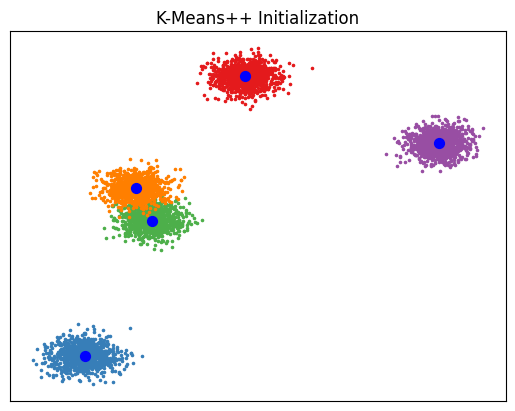

In [39]:
centers_init_fuzzy = fcm.centers
scater_center(n_clusters, y, centers_init_fuzzy) 

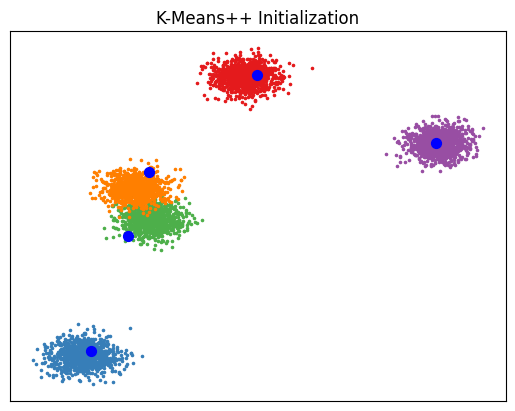

In [40]:
# always find the attribute that contains centers  coordinates 

fcm._centers = centers_init
centers_init_fuzzy = fcm.centers
scater_center(n_clusters, y, centers_init_fuzzy) 